# GARCH


## Import thư viện


In [1]:
pip install numpy pandas matplotlib arch statsmodels yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Bitcoin Dataset


In [3]:
file_path = "D:\\github_desktop\\Cryptocurrency-Price-Prediction\\Cryptocurrency\\Dataset\\Ethereum Historical Data.csv"

df = pd.read_csv(file_path)

In [4]:
# Chuyển đổi cột 'Date' sang định dạng ngày tháng
df['Date'] = pd.to_datetime(df['Date'])

# Đặt cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

# Sắp xếp dữ liệu theo ngày tháng
df.sort_values('Date', inplace=True)

price = df['Price']

In [5]:
# Ensure the 'price' column is numeric
price = price.str.replace(',', '').astype(float)

### Chia 7:3


In [6]:
train_data = price[:int(0.7 * len(price))]
test_data = price[int(0.7 * len(price)):]

In [7]:
# Fit the GARCH model
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Extract predicted values
predictions = np.sqrt(forecast.variance.values[-1, :])

# Forecast for the next 90 days
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Create future dates for 30, 60, and 90 days
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 41702.51919912957
Iteration:      2,   Func. Count:     11,   Neg. LLF: 11275.457472486967
Iteration:      3,   Func. Count:     15,   Neg. LLF: 11273.9223105095
Iteration:      4,   Func. Count:     19,   Neg. LLF: 11273.406016648225
Iteration:      5,   Func. Count:     23,   Neg. LLF: 11273.385764211846
Iteration:      6,   Func. Count:     27,   Neg. LLF: 11273.385604581275
Iteration:      7,   Func. Count:     30,   Neg. LLF: 11273.385605409154
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11273.385604581275
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 7


C:\Users\Hii\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.348e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


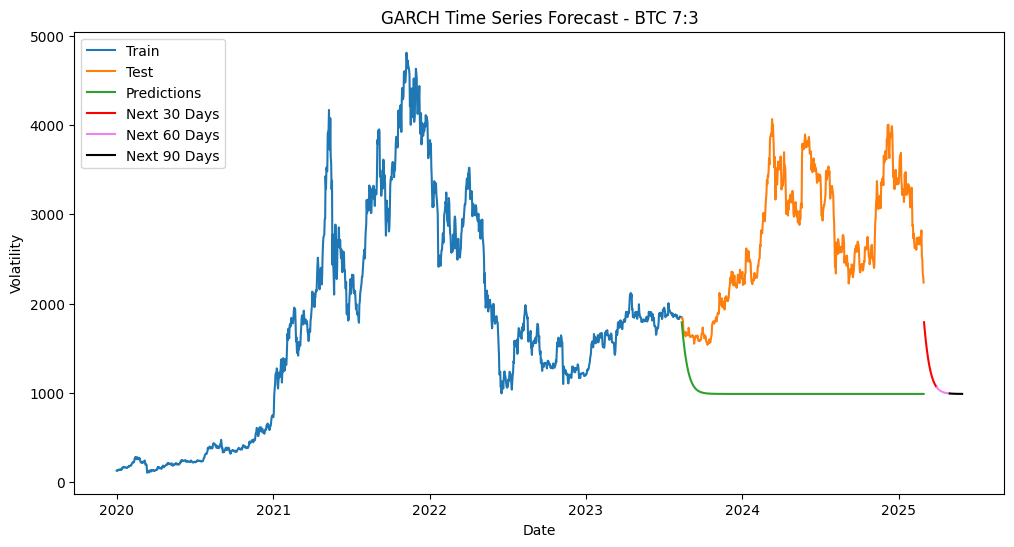

In [8]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast - BTC 7:3')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 1878.1746610740577
MAPE: 60.272431859766584 %
MSE: 3527540.057500651


### Chia 8:2


In [10]:
train_data = price[:int(0.8 * len(price))]
test_data = price[int(0.8 * len(price)):]

In [11]:
# Fit the GARCH model
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Extract predicted values
predictions = np.sqrt(forecast.variance.values[-1, :])

# Forecast for the next 90 days
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Create future dates for 30, 60, and 90 days
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 47639.10483984169
Iteration:      2,   Func. Count:     11,   Neg. LLF: 12968.061307050142
Iteration:      3,   Func. Count:     15,   Neg. LLF: 12966.819151219737
Iteration:      4,   Func. Count:     19,   Neg. LLF: 12966.407169812766
Iteration:      5,   Func. Count:     23,   Neg. LLF: 12966.396691263799
Iteration:      6,   Func. Count:     27,   Neg. LLF: 12966.396635609248
Iteration:      7,   Func. Count:     30,   Neg. LLF: 12966.39663643541
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12966.396635609248
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 7


C:\Users\Hii\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.204e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


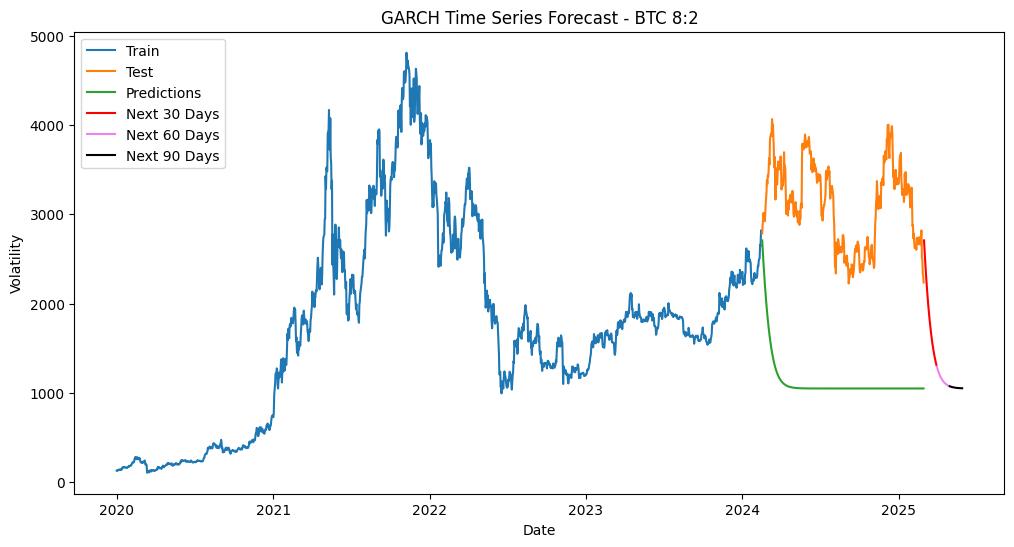

In [12]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast - BTC 8:2')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 2058.076836617744
MAPE: 63.308570013949726 %
MSE: 4235680.2654225


### Chia 9:1


In [14]:
train_data = price[:int(0.9 * len(price))]
test_data = price[int(0.9 * len(price)):]

In [15]:
# Fit the GARCH model
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Extract predicted values
predictions = np.sqrt(forecast.variance.values[-1, :])

# Forecast for the next 90 days
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Create future dates for 30, 60, and 90 days
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 53748.47788636129
Iteration:      2,   Func. Count:     11,   Neg. LLF: 14775.757012128963
Iteration:      3,   Func. Count:     15,   Neg. LLF: 14774.566875051314
Iteration:      4,   Func. Count:     19,   Neg. LLF: 14774.19818977015
Iteration:      5,   Func. Count:     23,   Neg. LLF: 14774.190595194645
Iteration:      6,   Func. Count:     27,   Neg. LLF: 14774.190563491005
Iteration:      7,   Func. Count:     30,   Neg. LLF: 14774.190564417528
Optimization terminated successfully    (Exit mode 0)
            Current function value: 14774.190563491005
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 7


C:\Users\Hii\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.324e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


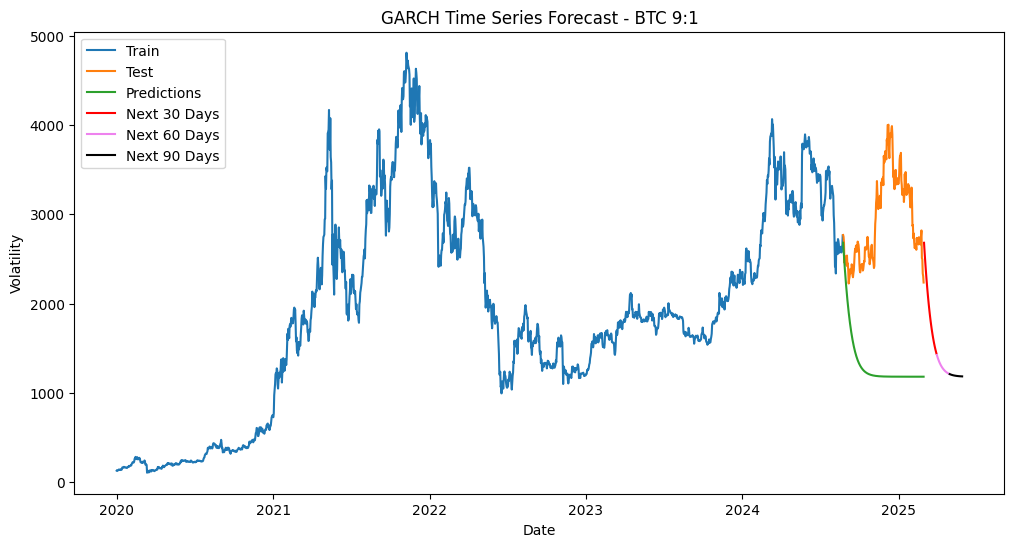

In [16]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast - BTC 9:1')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 1761.9159315927473
MAPE: 53.37856026224945 %
MSE: 3104347.750000338


## Ethereum Dataset


In [18]:
file_path = "D:\\github_desktop\\Cryptocurrency-Price-Prediction\\Cryptocurrency\\Dataset\\XRP Historical Data.csv"

df = pd.read_csv(file_path)

In [19]:
# Chuyển đổi cột 'Date' sang định dạng ngày tháng
df['Date'] = pd.to_datetime(df['Date'])

# Đặt cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

# Sắp xếp dữ liệu theo ngày tháng
df.sort_values('Date', inplace=True)

price = df['Price']

In [20]:
# Ensure the 'price' column is numeric (already numeric, no changes needed)
price = price

### Chia 7:3


In [21]:
train_data = price[:int(0.7 * len(price))]
test_data = price[int(0.7 * len(price)):]

In [22]:
# Fit the GARCH model
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Extract predicted values
predictions = np.sqrt(forecast.variance.values[-1, :])

# Forecast for the next 90 days
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Create future dates for 30, 60, and 90 days
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 680538518.3688381
Iteration:      2,   Func. Count:     11,   Neg. LLF: 837.5599072488924
Iteration:      3,   Func. Count:     15,   Neg. LLF: 837.4998900746518
Iteration:      4,   Func. Count:     19,   Neg. LLF: 837.4768832611064
Iteration:      5,   Func. Count:     23,   Neg. LLF: 837.4730031571198
Iteration:      6,   Func. Count:     27,   Neg. LLF: 837.4605481112903
Iteration:      7,   Func. Count:     31,   Neg. LLF: 837.4570368149676
Iteration:      8,   Func. Count:     35,   Neg. LLF: 837.4570334326681
Iteration:      9,   Func. Count:     38,   Neg. LLF: 837.457033404195
Optimization terminated successfully    (Exit mode 0)
            Current function value: 837.4570334326681
            Iterations: 9
            Function evaluations: 38
            Gradient evaluations: 9


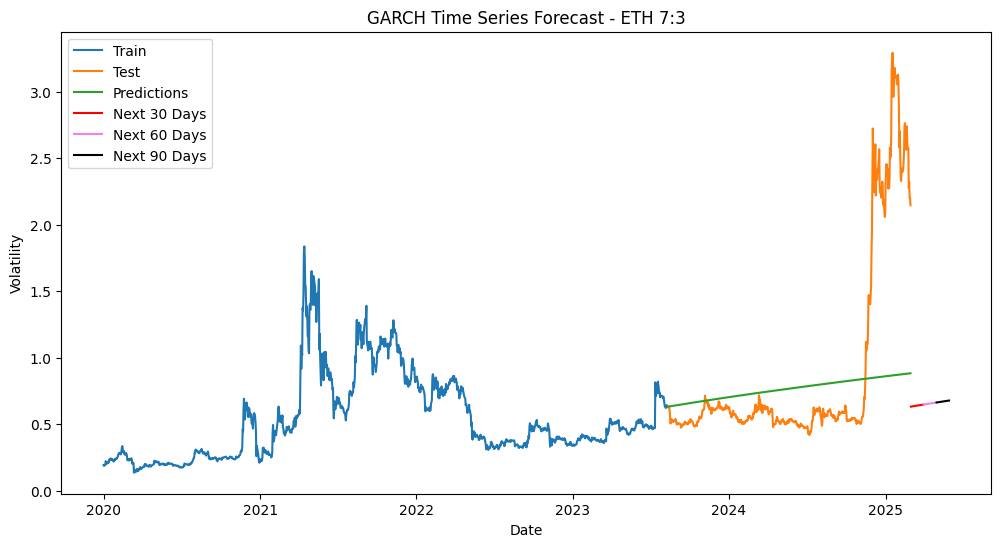

In [23]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast - ETH 7:3')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 0.7142599015554181
MAPE: 39.56687618215546 %
MSE: 0.5101672069699555


### Chia 8:2


In [25]:
train_data = price[:int(0.8 * len(price))]
test_data = price[int(0.8 * len(price)):]

In [26]:
# Fit the GARCH model
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Extract predicted values
predictions = np.sqrt(forecast.variance.values[-1, :])

# Forecast for the next 90 days
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Create future dates for 30, 60, and 90 days
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 22595443.981805734
Iteration:      2,   Func. Count:     11,   Neg. LLF: 996.0994845142237
Iteration:      3,   Func. Count:     15,   Neg. LLF: 996.0846771053557
Iteration:      4,   Func. Count:     19,   Neg. LLF: 996.0611967014618
Iteration:      5,   Func. Count:     23,   Neg. LLF: 996.0554255050868
Iteration:      6,   Func. Count:     27,   Neg. LLF: 996.0389437279116
Iteration:      7,   Func. Count:     31,   Neg. LLF: 996.0371737005025
Iteration:      8,   Func. Count:     35,   Neg. LLF: 996.0371705708164
Iteration:      9,   Func. Count:     38,   Neg. LLF: 996.0371705457828
Optimization terminated successfully    (Exit mode 0)
            Current function value: 996.0371705708164
            Iterations: 9
            Function evaluations: 38
            Gradient evaluations: 9


C:\Users\Hii\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.08797. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


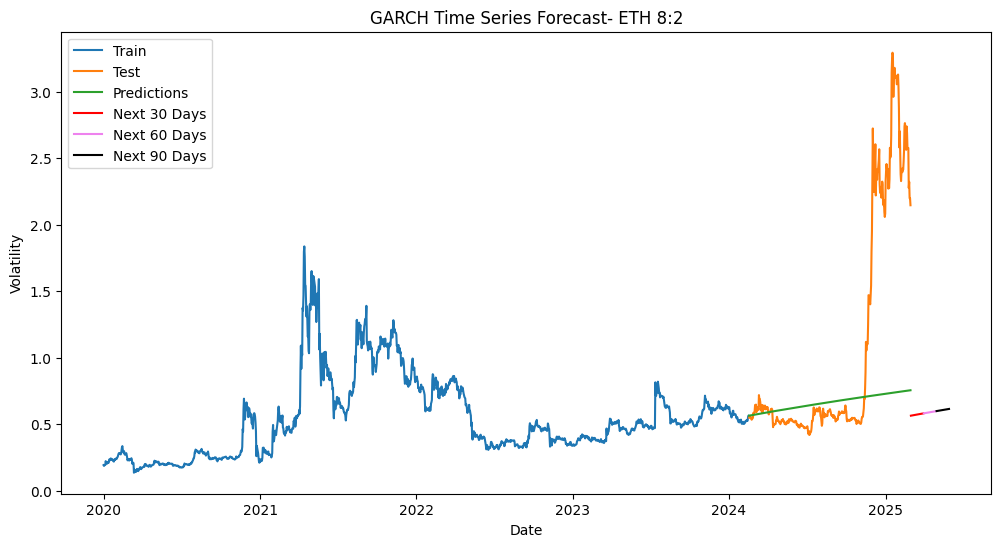

In [27]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast- ETH 8:2')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 0.9164101272275421
MAPE: 32.180958345527706 %
MSE: 0.8398075212852


### Chia 9:1


In [29]:
train_data = price[:int(0.9 * len(price))]
test_data = price[int(0.9 * len(price)):]

In [30]:
# Fit the GARCH model
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Extract predicted values
predictions = np.sqrt(forecast.variance.values[-1, :])

# Forecast for the next 90 days
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Create future dates for 30, 60, and 90 days
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 48468088.711935416
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1149.605847249704
Iteration:      3,   Func. Count:     15,   Neg. LLF: 1149.611634894191
Iteration:      4,   Func. Count:     20,   Neg. LLF: 1149.5859077561536
Iteration:      5,   Func. Count:     24,   Neg. LLF: 1149.5611878303575
Iteration:      6,   Func. Count:     28,   Neg. LLF: 1149.5587107579518
Iteration:      7,   Func. Count:     32,   Neg. LLF: 1149.5587073617858
Iteration:      8,   Func. Count:     35,   Neg. LLF: 1149.5587073362271
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1149.5587073617858
            Iterations: 8
            Function evaluations: 35
            Gradient evaluations: 8


C:\Users\Hii\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.07861. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


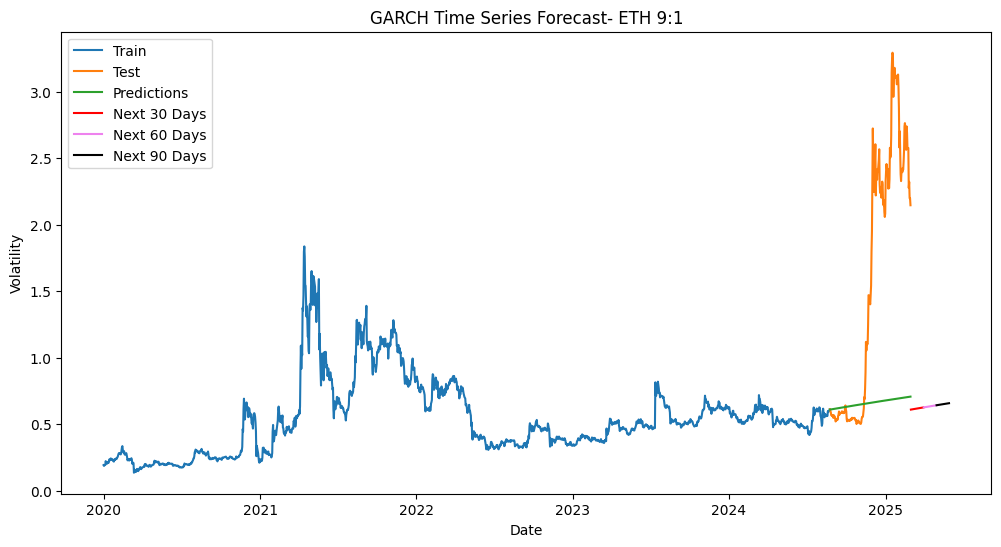

In [31]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast- ETH 9:1')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 1.3241544578495779
MAPE: 45.07274243136811 %
MSE: 1.7533850282429095


## XRP Dataset


In [33]:
file_path = "D:\\github_desktop\\Cryptocurrency-Price-Prediction\\Cryptocurrency\\Dataset\\Bitcoin Historical Data.csv"

df = pd.read_csv(file_path)

In [34]:
# Chuyển đổi cột 'Date' sang định dạng ngày tháng
df['Date'] = pd.to_datetime(df['Date'])

# Đặt cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

# Sắp xếp dữ liệu theo ngày tháng
df.sort_values('Date', inplace=True)

price = df['Price']

In [35]:
# Ensure the 'price' column is numeric
price = price.str.replace(',', '').astype(float)

### Chia 7:3


In [36]:
train_data = price[:int(0.7 * len(price))]
test_data = price[int(0.7 * len(price)):]

In [37]:
# Fit the GARCH model
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Extract predicted values
predictions = np.sqrt(forecast.variance.values[-1, :])

# Forecast for the next 90 days
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Create future dates for 30, 60, and 90 days
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 45309.616166006235
Iteration:      2,   Func. Count:     11,   Neg. LLF: 15170.697871617056
Iteration:      3,   Func. Count:     15,   Neg. LLF: 15170.558197716004
Iteration:      4,   Func. Count:     19,   Neg. LLF: 15170.024384424745
Iteration:      5,   Func. Count:     23,   Neg. LLF: 15169.614880878013
Iteration:      6,   Func. Count:     27,   Neg. LLF: 15169.608831828387
Iteration:      7,   Func. Count:     31,   Neg. LLF: 15169.608798183333
Iteration:      8,   Func. Count:     34,   Neg. LLF: 15169.608798264153
Optimization terminated successfully    (Exit mode 0)
            Current function value: 15169.608798183333
            Iterations: 8
            Function evaluations: 34
            Gradient evaluations: 8


C:\Users\Hii\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.461e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


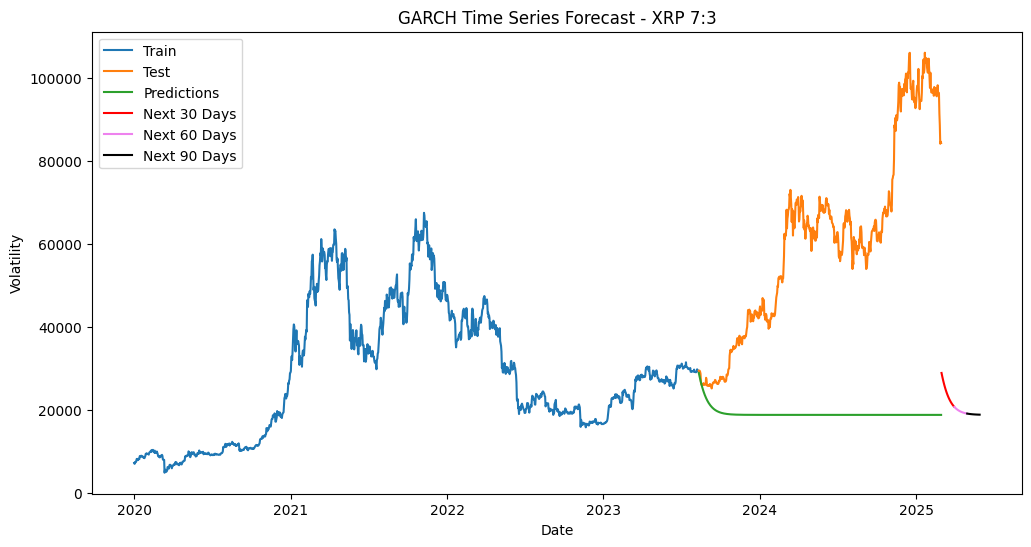

In [38]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast - XRP 7:3')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 47730.346995125685
MAPE: 62.63931612740264 %
MSE: 2278186024.2751036


### Chia 8:2


In [40]:
train_data = price[:int(0.8 * len(price))]
test_data = price[int(0.8 * len(price)):]

In [41]:
# Fit the GARCH model
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Extract predicted values
predictions = np.sqrt(forecast.variance.values[-1, :])

# Forecast for the next 90 days
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Create future dates for 30, 60, and 90 days
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 51826.399370680505
Iteration:      2,   Func. Count:     11,   Neg. LLF: 17416.01696837014
Iteration:      3,   Func. Count:     15,   Neg. LLF: 17415.803276857492
Iteration:      4,   Func. Count:     19,   Neg. LLF: 17415.132880502402
Iteration:      5,   Func. Count:     23,   Neg. LLF: 17414.96696991811
Iteration:      6,   Func. Count:     27,   Neg. LLF: 17414.965179974704
Iteration:      7,   Func. Count:     31,   Neg. LLF: 17414.9651765691
Iteration:      8,   Func. Count:     34,   Neg. LLF: 17414.965176656842
Optimization terminated successfully    (Exit mode 0)
            Current function value: 17414.9651765691
            Iterations: 8
            Function evaluations: 34
            Gradient evaluations: 8


C:\Users\Hii\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.283e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


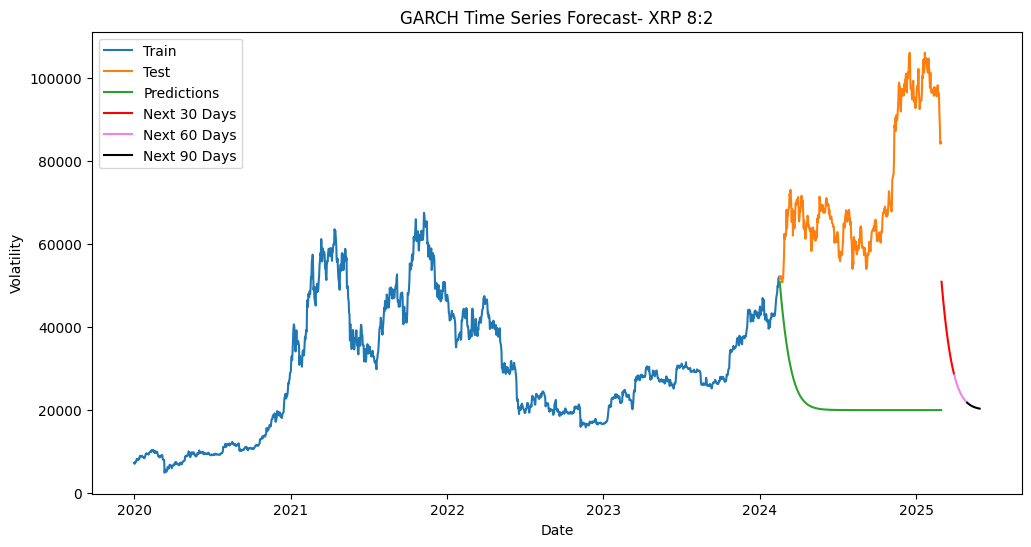

In [42]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast- XRP 8:2')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 54829.01212413632
MAPE: 68.63969843966221 %
MSE: 3006220570.508688


### Chia 9:1


In [44]:
train_data = price[:int(0.9 * len(price))]
test_data = price[int(0.9 * len(price)):]

In [45]:
# Fit the GARCH model
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Extract predicted values
predictions = np.sqrt(forecast.variance.values[-1, :])

# Forecast for the next 90 days
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Create future dates for 30, 60, and 90 days
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 58515.17300429332
Iteration:      2,   Func. Count:     11,   Neg. LLF: 19765.401306811604
Iteration:      3,   Func. Count:     15,   Neg. LLF: 19765.065163022187
Iteration:      4,   Func. Count:     19,   Neg. LLF: 19764.1081266922
Iteration:      5,   Func. Count:     23,   Neg. LLF: 19763.979868250488
Iteration:      6,   Func. Count:     27,   Neg. LLF: 19763.978261686512
Iteration:      7,   Func. Count:     31,   Neg. LLF: 19763.97825960649
Iteration:      8,   Func. Count:     34,   Neg. LLF: 19763.978259744574
Optimization terminated successfully    (Exit mode 0)
            Current function value: 19763.97825960649
            Iterations: 8
            Function evaluations: 34
            Gradient evaluations: 8


C:\Users\Hii\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.239e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


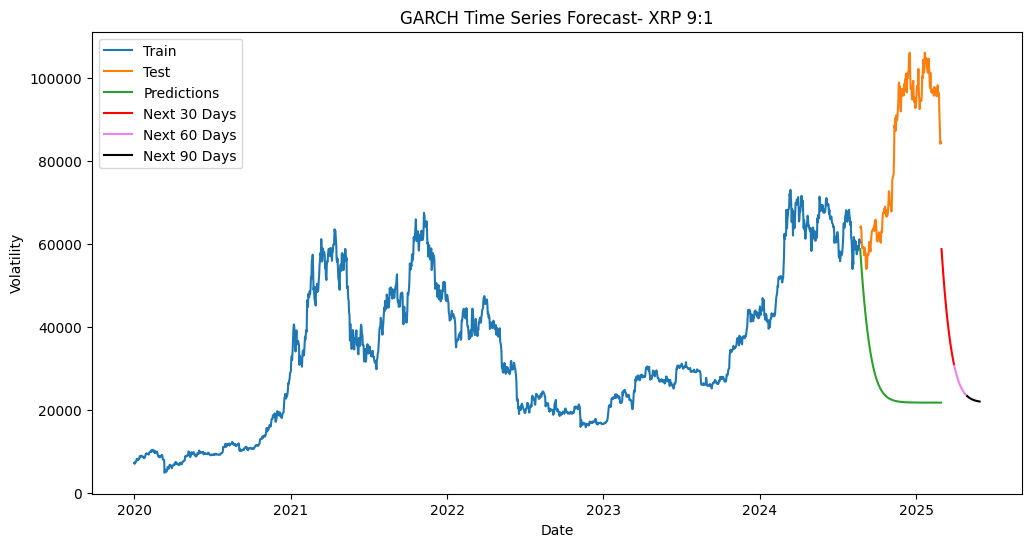

In [46]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast- XRP 9:1')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 61813.56336871425
MAPE: 65.80987951012733 %
MSE: 3820916616.3380523
